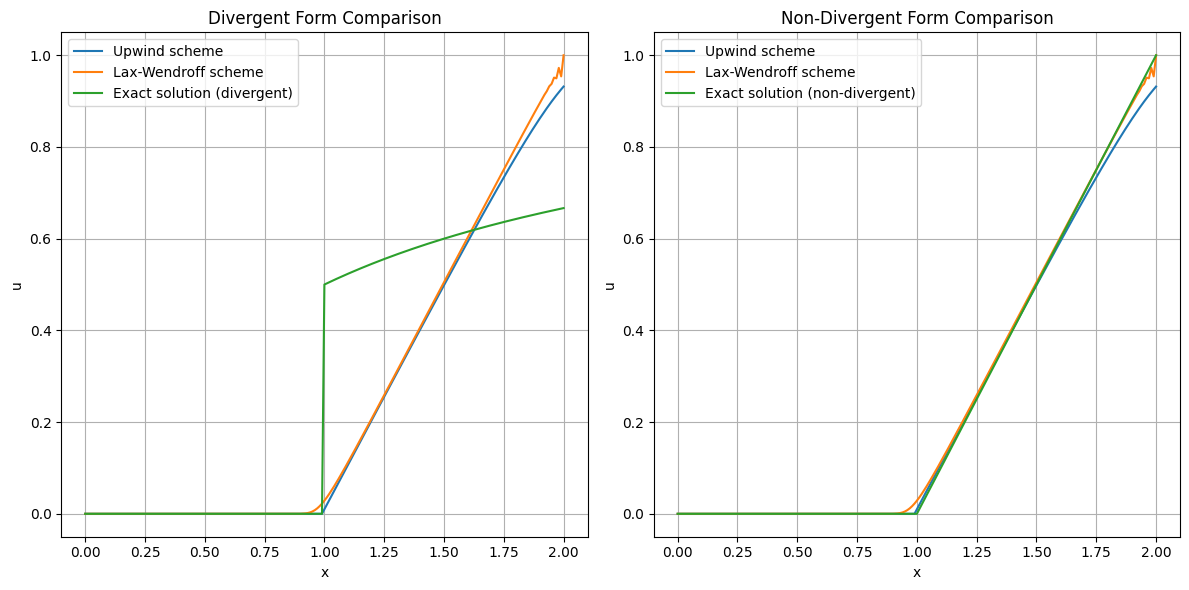

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Определение констант и параметров
u0 = 1.0
x0 = 1.0
x1 = 2.0
T = 1.0
dx = 0.01
dt = 0.001

# Функция точного решения для дивергентной формы
def exact_solution_divergent(x, t):
    return u0*x/(x0 + t*x/(x1-x0)) if x >= x0 and x <= x1 else 0

# Функция точного решения для недивергентной формы
def exact_solution_nondivergent(x, t):
    return u0*(x-x0)/(x1-x0) if x >= x0 and x <= x1 else 0

# Численный метод - левый уголок
def upwind(u, dx, dt):
    unew = np.copy(u)
    for i in range(1, len(u)):
        unew[i] = u[i] - u[i] * dt/dx * (u[i] - u[i-1])
    return unew

# Численный метод - Лакса-Вендроффа
def lax_wendroff(u, dx, dt):
    unew = np.copy(u)
    for i in range(1, len(u) - 1):
        unew[i] = u[i] - 0.5 * u[i] * dt / dx * (u[i+1] - u[i-1]) + 0.5 * (dt / dx)**2 * (u[i+1] - 2*u[i] + u[i-1])
    return unew

# Создание сетки по x и t
x = np.arange(0, 2 + dx, dx)
t = np.arange(0, T + dt, dt)

# Инициализация начального состояния
u_l_u = np.zeros_like(x)
u_lv = np.zeros_like(x)
u_exact_divergent = np.zeros_like(x)
u_exact_nondivergent = np.zeros_like(x)
for i in range(len(u_l_u)):
    u_l_u[i] = u0 if x[i] >= x0 and x[i] <= x1 else 0
    u_lv[i] = u0 if x[i] >= x0 and x[i] <= x1 else 0
    u_exact_divergent[i] = exact_solution_divergent(x[i], 0)
    u_exact_nondivergent[i] = exact_solution_nondivergent(x[i], 0)

# Цикл по времени для численного решения дивергентной формы
for ti in t:
    u_l_u = upwind(u_l_u, dx, dt)

# Цикл по времени для численного решения недивергентной формы
for ti in t:
    u_lv = lax_wendroff(u_lv, dx, dt)

# Вычисление точного решения для последнего момента времени
for i in range(len(u_exact_divergent)):
    u_exact_divergent[i] = exact_solution_divergent(x[i], T)
    u_exact_nondivergent[i] = exact_solution_nondivergent(x[i], T)

# Визуализация результатов для дивергентной формы
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, u_l_u, label='Upwind scheme')
plt.plot(x, u_lv, label='Lax-Wendroff scheme')
plt.plot(x, u_exact_divergent, label='Exact solution (divergent)')
plt.xlabel('x')
plt.ylabel('u')
plt.title('Divergent Form Comparison')
plt.legend()
plt.grid()

# Визуализация результатов для недивергентной формы
plt.subplot(1, 2, 2)
plt.plot(x, u_l_u, label='Upwind scheme')
plt.plot(x, u_lv, label='Lax-Wendroff scheme')
plt.plot(x, u_exact_nondivergent, label='Exact solution (non-divergent)')
plt.xlabel('x')
plt.ylabel('u')
plt.title('Non-Divergent Form Comparison')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
